# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Import dependencies
import pandas as pd
import json
import requests
from config import api_key
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from citipy import citipy
from pprint import pprint

# Observations:

1. Max Temperature: Based on the scatterplot, the max temperature increases the closer you move to the equator. This observation is expected but it is not necessarily supported by the linear regression and R2 values. The R2 value for cities in the Northern Hemisphere is 0.43 which would indicate that only 43% of the change in max temperature can be attributed by a change in latitude. The R2 value for the Southern Hemisphere is hight at 0.60, which could indicate that the change in latitude has a greater contribution to a change in max temperature.

2. Max Temparture shows some "outlier" type variation at latitude 40 in the Northern Hemisphere and cities at this latitude have the highest max temperature of the sample. This would indicate that there are other factors besides latitude at play that impact these cities, this could be related to elevation, topographical factors, air streams, etc.

3. Other weather factors: Based on the analysis, there doesn't appear to be any relationship between latitude and humidity, cloudiness, or wind speed. I would have thought that humidity would increase towards the equator, but that is not supported by the data. 

4. There are fewer cities in Southern Latitude extremes (only a few over -40), while there are more in Nothern extremes. This could result in invalid analysis when grouping both hemishperes together. 

## Generate Cities List

In [2]:
#Generate Cities List
#Create random coordinates
lats = np.random.randint(-90, 90, size = 1300)
longs = np.random.randint(-180, 180, size = 1300)

coords_df = pd.DataFrame({"latitude": lats, "longitude": longs})

coords_df

,latitude,longitude
0,-79,54
1,18,110
2,5,-178
3,68,-156
4,26,-26
...,...,...
1295,-71,1
1296,39,50
1297,-28,-40
1298,25,88


In [3]:
#Iterate through citipy to build list
cities = []

for ind, row in coords_df.iterrows():
    lat, longs = row["latitude"], row["longitude"]
    city = citipy.nearest_city(lat, longs).city_name
    
    if city not in cities:
        cities.append(city)
 
len(cities)

568

In [4]:
### Perform API Calls
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).

#set url and query
cities_s = cities
units = 'imperial'
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL and request your results in Celsius

# Get weather data
# set up lists to hold reponse info
name = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#set groupings for api calls and log print
count = 0
set_one = 1

print("Beginning Data Retrieval\n-------------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    query_url = f"{url}appid={api_key}&units={units}&q="
          
    response = requests.get(query_url + city).json()    
    
    try:
#         name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
 
        if count > 50:
            count = 1
            set_one += 1
            name.append(city)
        else:
            count += 1
            name.append(city)
        print(f"Processing Record {count} of Set {set_one} | {city}")
    except (KeyError, IndexError):
        print("City not found. Skipping...")
print("--------------------------------\nData Retrieval Complete\n--------------------------------")
    

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | wanning
City not found. Skipping...
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | los llanos de aridane
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | rio verde de mato grosso
Processing Record 7 of Set 1 | wanlaweyn
Processing Record 8 of Set 1 | vredendal
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | nemuro
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | pacific grove
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | hualmay
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | carauari
Processing Record 20 of Set 1 | saint-georges
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create dataframe
weather_dict = {"City Name": name, "Lat": lat, "Lng": lon, "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed":
    wind_speed, "Country": country, "Date": date}

weather_data = pd.DataFrame(weather_dict)

#Export the dataframe to a CSV

weather_data.to_csv("Weather_data_output.csv")

weather_data


,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,27.9116,74.08,75,0,22.17,ZA,1642971492
1,wanning,18.8003,110.3967,71.98,92,87,4.12,CN,1642971492
2,barrow,71.2906,-156.7887,-0.38,71,100,5.75,US,1642971493
3,los llanos de aridane,28.6585,-17.9182,64.15,96,75,3.00,ES,1642971493
4,airai,-8.9266,125.4092,60.73,87,100,2.64,TL,1642971493
...,...,...,...,...,...,...,...,...,...
517,udachnyy,66.4167,112.4000,-8.25,99,80,5.37,RU,1642971649
518,kumukh,42.1704,47.1161,27.57,60,4,11.34,RU,1642971649
519,mogadishu,2.0371,45.3438,77.77,79,98,23.38,SO,1642971610
520,neftcala,39.3742,49.2472,40.96,60,0,5.14,AZ,1642971650


In [6]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,5.220000e+02
mean,19.375977,17.103812,50.975115,73.321839,61.082375,7.935192,1.642972e+09
std,33.849197,92.856066,31.987716,20.682312,38.812840,6.584475,7.507258e+01
min,-54.800000,-179.166700,-41.480000,12.000000,0.000000,0.000000,1.642971e+09
25%,-8.079475,-65.192525,29.517500,61.000000,20.000000,3.405000,1.642972e+09
50%,21.368750,19.868450,62.845000,78.000000,75.000000,6.125000,1.642972e+09
75%,48.944075,98.372075,77.315000,89.750000,100.000000,10.360000,1.642972e+09
max,78.218600,178.416700,106.900000,100.000000,100.000000,54.740000,1.642972e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = weather_data[weather_data["Humidity"] > 100]

high_humidity

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


The dataset did not contain any cities where the humidity was > 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

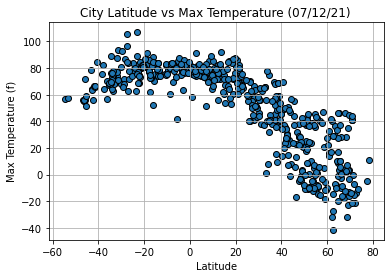

In [8]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
plt.scatter(x_values,y_values, edgecolor='black', )
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
plt.title('City Latitude vs Max Temperature (07/12/21) ')
plt.grid(zorder = 0)

plt.savefig("lat_vs_temp_plot.png")

plt.show()

## Latitude vs. Humidity Plot

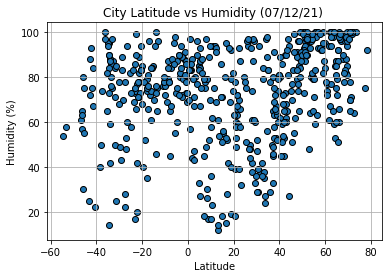

In [9]:
# Create a Scatter Plot for Latitude vs Humidity
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values, edgecolor='black', )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (07/12/21) ')
plt.grid(zorder = 0)
#save plot png
plt.savefig("lat_vs_humidity_plot.png")
#show plot
plt.show()

## Latitude vs. Cloudiness Plot

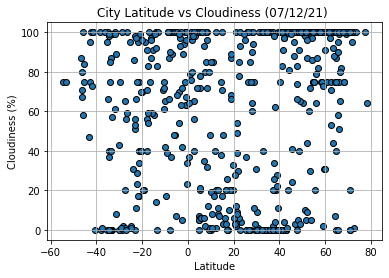

In [10]:
# Create a Scatter Plot for Latitude vs Cloudiness
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values, edgecolor='black', )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (07/12/21) ')
plt.grid(zorder = 0)
#save png file
plt.savefig("lat_vs_cloudiness_plot.png")
#show plot
plt.show()

## Latitude vs. Wind Speed Plot

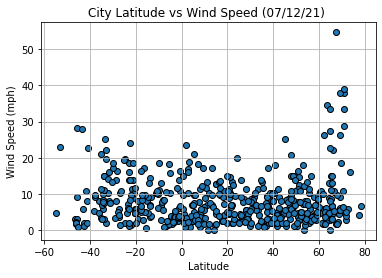

In [11]:
# Create a Scatter Plot for Latitude vs Humidity
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values, edgecolor='black', )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (07/12/21) ')
plt.grid(zorder = 0)
#save png file
plt.savefig("lat_vs_Wind_plot.png")
#show plot
plt.show()

## Linear Regression

In [12]:
#split dataframe into northern and southern hemispheres
northern = weather_data[weather_data['Lat'] >= 0]                        
southern = weather_data[weather_data['Lat'] <= 0]

#Values for plotting
n_values = northern['Lat']
s_values = southern['Lat']

northern

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,wanning,18.8003,110.3967,71.98,92,87,4.12,CN,1642971492
2,barrow,71.2906,-156.7887,-0.38,71,100,5.75,US,1642971493
3,los llanos de aridane,28.6585,-17.9182,64.15,96,75,3.00,ES,1642971493
6,wanlaweyn,2.6185,44.8938,75.99,67,65,16.93,SO,1642971494
8,upernavik,72.7868,-56.1549,-13.83,64,1,5.66,GL,1642971494
...,...,...,...,...,...,...,...,...,...
517,udachnyy,66.4167,112.4000,-8.25,99,80,5.37,RU,1642971649
518,kumukh,42.1704,47.1161,27.57,60,4,11.34,RU,1642971649
519,mogadishu,2.0371,45.3438,77.77,79,98,23.38,SO,1642971610
520,neftcala,39.3742,49.2472,40.96,60,0,5.14,AZ,1642971650


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7027932812336389


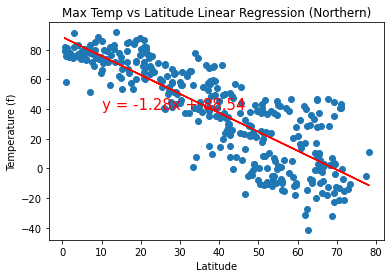

In [13]:
# Add the linear regression equation and line to plot
y_values = northern['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_values, y_values)
regress_values = n_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_values, y_values)
plt.plot(n_values, regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (f)')
plt.title('Max Temp vs Latitude Linear Regression (Northern)')
print(f"The r-squared is: {rvalue**2}")

#save png file
plt.savefig("max_temp_regression.png")
#show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.19042560472163997


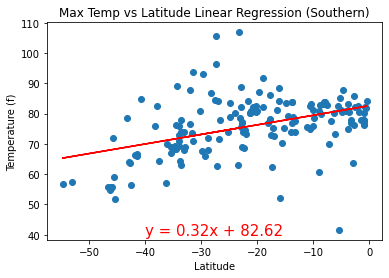

In [14]:
# Add the linear regression equation and line to plot
y_values = southern['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_values, y_values)
regress_values = s_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_values, y_values)
plt.plot(s_values, regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (f)')
plt.title('Max Temp vs Latitude Linear Regression (Southern)')
print(f"The r-squared is: {rvalue**2}")

#save png file
plt.savefig("s_max_temp_regression.png")
#show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1593786708536983


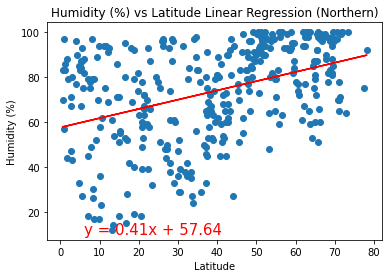

In [15]:
# Add the linear regression equation and line to plot
y_values = northern['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_values, y_values)
regress_values = n_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_values, y_values)
plt.plot(n_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity (%) vs Latitude Linear Regression (Northern)')
print(f"The r-squared is: {rvalue**2}")

#save png file
plt.savefig("north_humidity_regression.png")
#show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06354501249290598


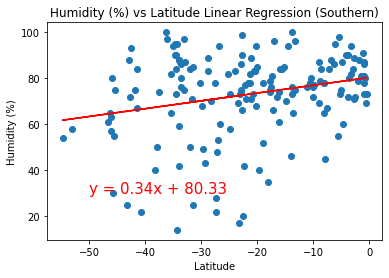

In [16]:
# Add the linear regression equation and line to plot
y_values = southern['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_values, y_values)
regress_values = s_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_values, y_values)
plt.plot(s_values, regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity (%) vs Latitude Linear Regression (Southern)')
print(f"The r-squared is: {rvalue**2}")

#save png file
plt.savefig("north_humidity_regression.png")
#show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09741318479960638


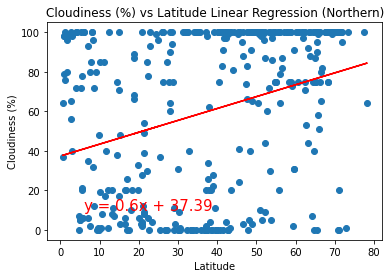

In [17]:
# Add the linear regression equation and line to plot
y_values = northern['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_values, y_values)
regress_values = n_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_values, y_values)
plt.plot(n_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness (%) vs Latitude Linear Regression (Northern)')
print(f"The r-squared is: {rvalue**2}")

#save png file
plt.savefig("northern_cloudiness_regression.png")
#show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.010677289180622995


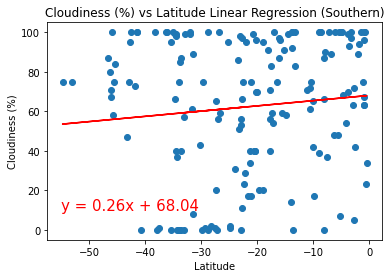

In [18]:
# Add the linear regression equation and line to plot
y_values = southern['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_values, y_values)
regress_values = s_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_values, y_values)
plt.plot(s_values, regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness (%) vs Latitude Linear Regression (Southern)')
print(f"The r-squared is: {rvalue**2}")

#save png file
plt.savefig("southern_cloudiness_regression.png")
#show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.027706466002248107


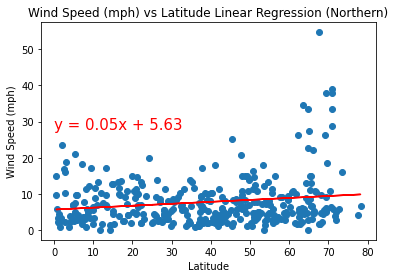

In [19]:
# Add the linear regression equation and line to plot
y_values = northern['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_values, y_values)
regress_values = n_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_values, y_values)
plt.plot(n_values, regress_values,"r-")
plt.annotate(line_eq,(0,28),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) vs Latitude Linear Regression (Northern)')
print(f"The r-squared is: {rvalue**2}")

#save png file
plt.savefig("northern_wind_regression.png")
#show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.037566101646598536


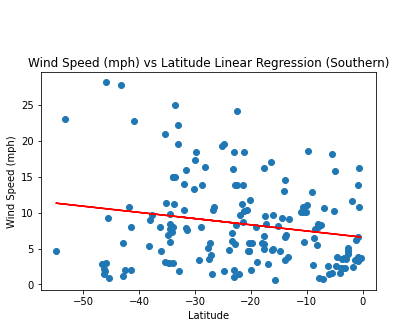

In [20]:
# Add the linear regression equation and line to plot
y_values = southern['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_values, y_values)
regress_values = s_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_values, y_values)
plt.plot(s_values, regress_values,"r-")
plt.annotate(line_eq,(-55,37),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) vs Latitude Linear Regression (Southern)')
print(f"The r-squared is: {rvalue**2}")

#save png file
plt.savefig("southern_wind_regression.png")
#show plot
plt.show()